In [3]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import matplotlib.pyplot as plt
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from math import pi
from orbithunter.gluing import rediscretize_fpo_dictionary

In [4]:
figs = '../data/local/orbithunter_thesis/figures/'

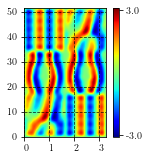

In [3]:
td = read_fpo_set(tileset='resized', rescaled=False, comoving=True)
td = rediscretize_fpo_dictionary(td, new_shape=(128,128))
# td = tile_dictionary_ks()
# td[0] = td[0].cell_shift(4, axis=1)
symbol_array = np.array([[0, 1], [2, 2], [1, 0]])
tiled_orbit = tile(symbol_array, td, OrbitKS).rescale(3).reshape().transform(to='modes')
tiled_orbit.plot()


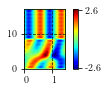

In [4]:
symbol_array = np.array([[0], [1]])
tiled_orbit = tile(symbol_array, td, OrbitKS).reshape().transform(to='modes')
tiled_orbit.plot()

In [5]:
from orbithunter.ks.arrayops import calculate_spatial_shift

In [90]:
rpotest.S = calculate_spatial_shift(rpotest.transform(to='s_modes').state, rpotest.L, n_modes=15) 

rpotest.frame

rpotest.S = -rpotest.S

rpotest = rpotest.change_reference_frame(to='comoving')

rpotest.plot(padding=False, fundamental_domain=False)

In [103]:
rpo_result = converge(rpotest.transform(to='modes'), method='hybrid', verbose=True, preconditioning=True, pexp=(1,4))


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 0.47647750531243765
Target residual tolerance : 5.12e-07
Maximum iteration number : 8192
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["26.7683", "13.0383", "3.2621"], "field_shape": ["16", "32"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=0.0537139 after 5000 adjoint descent steps. Parameters:(26.769080597220615, 13.038289466970566, 3.3664996921388233)
###############################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 0.0416733521033987
Target residual tolerance : 5.12e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["26.7694", "13.0383", "3.3877"], "f

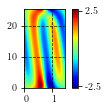

In [105]:
rpo_result.orbit.plot(fundamental_domain=False)

In [101]:
rpotest.residual()

0.47647750531243765

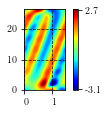

In [60]:
clip(result.orbit, ((None, result.orbit.T/2.),(None, None)), RelativeOrbitKS).plot()


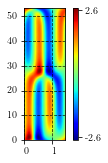

In [54]:
result.orbit.reflection().roll(result.orbit.N//2, axis=0).plot()#residual()

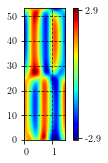

In [57]:
convert_class(result.orbit, ShiftReflectionOrbitKS).plot(fundamental_domain=False)

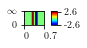

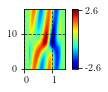

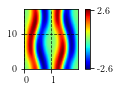

In [63]:
td = read_fpo_set(tileset='extra_padded_space', rescaled=True, comoving=True)
td[0].plot()
td[1].plot()
td[2].plot()

In [6]:
td = read_fpo_set(tileset='resized', rescaled=True, comoving=True)



In [72]:
np.random.seed(0)
big_symbol_array = (3*np.random.rand(5, 5)).astype(int)

big_tiling = tile(big_symbol_array, td, OrbitKS, stripwise=True,
                  gluing_order=(1,0)).reshape(64, 64)

big_tiling.plot()

#show=True, padding=True, padding_shape=(512, 512),
 #               save=True, filename='big_tiling_initial_no_stripwise.pdf',
  #              directory=figs)

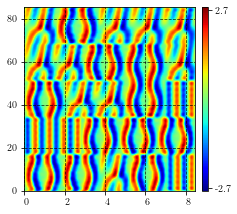

In [49]:
np.random.seed(0)
big_symbol_array = (3*np.random.rand(5, 5)).astype(int)

big_tiling = tile(big_symbol_array, td, OrbitKS, stripwise=True,
                  gluing_order=(1,0)).reshape(64, 64)

big_tiling = tile(big_symbol_array, td, OrbitKS, stripwise=True,
                  gluing_order=(1,0)).reshape(64, 64).transform(to='modes')
big_tiling.plot(show=True, padding=True, padding_shape=(512, 512),
                save=True, filename='big_tiling_initial.pdf',
                directory=figs)

In [50]:
big_tiling.residual()

3242.0021235163513

In [52]:
big_tiling_result_gdnoprec = converge(big_tiling, comp_time='excessive', verbose=True)


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 3242.0021235163513
Target residual tolerance : 4.096e-06
Maximum iteration number : 2097152
Initial guess : OrbitKS({"basis": "modes", "parameters": ["85.7544", "75.2195", "0"], "field_shape": ["64", "64"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=20.6003901 after 5000 adjoint descent steps. Parameters=(91.83007435095259, 80.23484821528892, 0)
#################################################
 Residual=11.3337931 after 10000 adjoint descent steps. Parameters=(93.48476149305282, 80.48192165371992, 0)
#################################################
 Residual=7.9695313 after 15000 adjoint descent steps. Parameters=(94.50441486897657, 80.67652663210973, 0)
#################################################
 Residual=6.2573957 after 

#################################################
 Residual=1.0422500 after 250000 adjoint descent steps. Parameters=(103.05709017020438, 81.58363671354864, 0)
#################################################
 Residual=1.0295649 after 255000 adjoint descent steps. Parameters=(103.14151902821331, 81.59572939389973, 0)
#################################################
 Residual=1.0172896 after 260000 adjoint descent steps. Parameters=(103.22493217993342, 81.60782567865088, 0)
#################################################
 Residual=1.0054018 after 265000 adjoint descent steps. Parameters=(103.30735922601774, 81.61991084277544, 0)
#################################################
 Residual=0.9938809 after 270000 adjoint descent steps. Parameters=(103.38882860153062, 81.63197129392489, 0)
#################################################
 Residual=0.9827076 after 275000 adjoint descent steps. Parameters=(103.4693676642651, 81.64399452604184, 0)
#########################################

In [56]:
figs = '../data/local/orbithunter_thesis/large/'

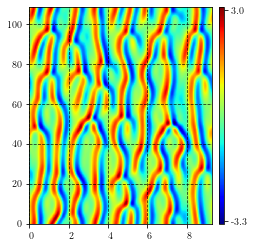

In [53]:
big_tiling_result_gdnoprec.orbit.plot()

In [25]:
big_tiling_result_gdnoprec.orbit.residual()

0.5415464911323149

In [58]:
big_tiling_result_gdnoprec.orbit.residual()

0.5851878499570089

In [59]:
big_tiling_result_gdnoprec.orbit

OrbitKS({"basis": "modes", "parameters": ["114.8365", "76.5672", "0"], "field_shape": ["64", "64"]})

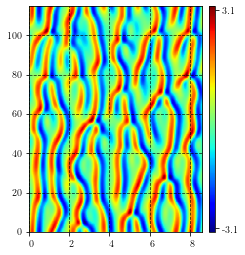

In [57]:
big_tiling_result_gdnoprec.orbit.plot(padding=True, 
                                      padding_shape=(512, 512), save=True,
                                        filename='big_tiling.pdf', 
                                        directory=figs)

In [35]:
lstsq_orbit = big_tiling_result_gdnoprec.orbit
lstsq_result = converge(lstsq_orbit, method='gmres', 
                        verbose=True, comp_time='thorough',
                        scipy_kwargs={'tol':1e-3},
                        preconditioning=True
                       )


------------------------------------------------------------------------------------------------
Starting gmres optimization
Initial residual : 0.5415464911323149
Target residual tolerance : 4.096e-06
Maximum iteration number : 1000
Initial guess : OrbitKS({"basis": "modes", "parameters": ["108.907", "82.2697", "0"], "field_shape": ["64", "64"]})
-------------------------------------------------------------------------------------------------


KeyboardInterrupt: 

In [48]:
lstsq_orbit = big_tiling_result_gdnoprec.orbit
lstsq_result = converge(lstsq_orbit, method='l-bfgs-b', 
                        verbose=True, comp_time='thorough',
                        scipy_kwargs={'tol':1e-3},
                        preconditioning=True,
                        maxiter=100
                       )


-------------------------------------------------------------------------------------------------
Starting l-bfgs-b optimization
Initial residual : 0.5415464911323149
Target residual tolerance : 4.096e-06
Initial guess : OrbitKS({"basis": "modes", "parameters": ["108.907", "82.2697", "0"], "field_shape": ["64", "64"]})
-------------------------------------------------------------------------------------------------
#########################
 Residual=0.1513782 after 25 adjoint descent steps. Parameters=(110.41106846204563, 82.05647145171798, 0)
 Residual=0.1513782 after 25 l-bfgs-b iterations. Parameters=(110.41106846204563, 82.05647145171798, 0)
#########################
 Residual=0.0497423 after 50 adjoint descent steps. Parameters=(111.83622601526953, 81.66354458119756, 0)
 Residual=0.0497423 after 50 l-bfgs-b iterations. Parameters=(111.83622601526953, 81.66354458119756, 0)
#########################
 Residual=0.0162753 after 75 adjoint descent steps. Parameters=(112.95493982007986

In [46]:
lstsq_result.orbit

OrbitKS({"basis": "modes", "parameters": ["168.9411", "82.0793", "0"], "field_shape": ["64", "64"]})

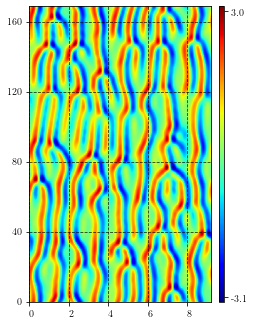

In [45]:
lstsq_result.orbit.plot()

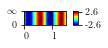

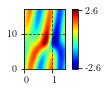

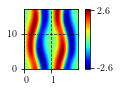

In [19]:
td = read_fpo_set(tileset='resized', rescaled=True, comoving=True)
td[0].plot()
td[1].plot()
td[2].plot()

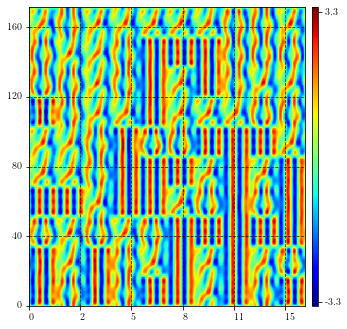

In [25]:
np.random.seed(0)
large_symbol_array = (3*np.random.rand(10, 10)).astype(int)

large_tiling = tile(large_symbol_array, td, OrbitKS, stripwise=False).reshape(64, 64).reshape().transform(to='modes')
large_tiling.plot(show=True, padding=True, padding_shape=(512, 512),
                save=True, filename='large_tiling_initial.pdf',
                directory=figs)

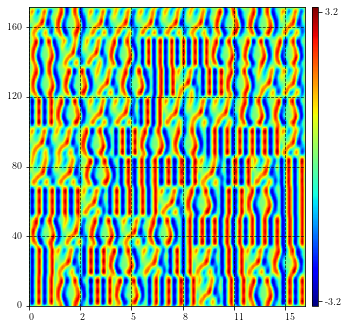

In [27]:
large_tiling_stripwise = tile(large_symbol_array, td, OrbitKS, stripwise=True, gluing_order=(1,0)).reshape(64, 128).reshape().transform(to='modes')
large_tiling_stripwise.plot(padding=True, padding_shape=(512, 512), save=True,
                filename='large_tiling_stripwise_initial.pdf', 
                directory=figs)


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 10507.1898715392
Target residual tolerance : 8.192e-06
Maximum iteration number : 4194304
Initial guess : OrbitKS({"basis": "modes", "parameters": ["171.5088", "143.7506", "0"], "field_shape": ["64", "128"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=114.4299025 after 5000 adjoint descent steps. Parameters=(175.99381555325132, 155.24768900260307, 0)
#################################################
 Residual=67.2983553 after 10000 adjoint descent steps. Parameters=(178.03361730816732, 157.004615346517, 0)
#################################################
 Residual=48.3135491 after 15000 adjoint descent steps. Parameters=(179.37356512757785, 158.01565577334384, 0)
#################################################
 Residual=37.765109

#################################################
 Residual=3.4188775 after 500000 adjoint descent steps. Parameters=(194.06016884853574, 169.74693999137796, 0)
#################################################
 Residual=3.3887138 after 505000 adjoint descent steps. Parameters=(194.13191169461518, 169.80559076904697, 0)
#################################################
 Residual=3.3589677 after 510000 adjoint descent steps. Parameters=(194.203299564805, 169.8637541190041, 0)
#################################################
 Residual=3.3296308 after 515000 adjoint descent steps. Parameters=(194.2743375881886, 169.92143217027694, 0)
#################################################
 Residual=3.3006950 after 520000 adjoint descent steps. Parameters=(194.34503086431224, 169.9786271508781, 0)
#################################################
 Residual=3.2721528 after 525000 adjoint descent steps. Parameters=(194.41538446647883, 170.035341379022, 0)
#########################################

#################################################
 Residual=1.7085156 after 1010000 adjoint descent steps. Parameters=(200.17918828353768, 173.74879683002388, 0)
#################################################
 Residual=1.7004078 after 1015000 adjoint descent steps. Parameters=(200.23088979567814, 173.77369750719453, 0)
#################################################
 Residual=1.6923937 after 1020000 adjoint descent steps. Parameters=(200.2824687910496, 173.79839375134316, 0)
#################################################
 Residual=1.6844713 after 1025000 adjoint descent steps. Parameters=(200.33392584350068, 173.82288688983678, 0)
#################################################
 Residual=1.6766388 after 1030000 adjoint descent steps. Parameters=(200.38526151642637, 173.84717828969593, 0)
#################################################
 Residual=1.6688941 after 1035000 adjoint descent steps. Parameters=(200.4364763631542, 173.8712693570515, 0)
###############################

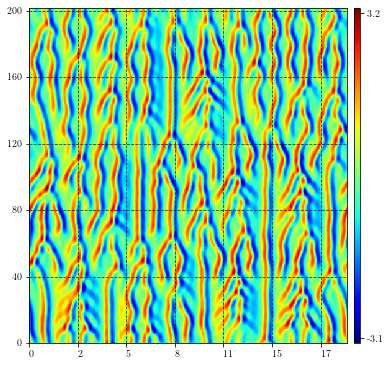

In [28]:
large_tiling_result_gdnoprec = converge(large_tiling, verbose=True, preconditioning=False,comp_time='excessive')
# large_tiling_result_gdnoprec.orbit.to_h5('large_tiling.h5', directory='../data/local/thesis/large/')
large_tiling_result_gdnoprec.orbit.plot(padding=True, padding_shape=(512, 512), save=True,
                                                filename='large_tiling.pdf', 
                                                directory=figs)


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 26044.02212449788
Target residual tolerance : 8.192e-06
Maximum iteration number : 4194304
Initial guess : OrbitKS({"basis": "modes", "parameters": ["171.5088", "143.7506", "0"], "field_shape": ["64", "128"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=65.7526410 after 5000 adjoint descent steps. Parameters=(178.65630433270852, 159.3543599131507, 0)
#################################################
 Residual=35.4824437 after 10000 adjoint descent steps. Parameters=(181.0707013189993, 159.6455508677788, 0)
#################################################
 Residual=24.1965983 after 15000 adjoint descent steps. Parameters=(182.508706931639, 159.67717628176732, 0)
#################################################
 Residual=18.5875732 a

#################################################
 Residual=3.1090895 after 250000 adjoint descent steps. Parameters=(195.16513730962396, 161.58970339964972, 0)
#################################################
 Residual=3.0618972 after 255000 adjoint descent steps. Parameters=(195.30731627995675, 161.60889354927704, 0)
#################################################
 Residual=3.0164941 after 260000 adjoint descent steps. Parameters=(195.44824654546332, 161.6279802715176, 0)
#################################################
 Residual=2.9727600 after 265000 adjoint descent steps. Parameters=(195.58796768719887, 161.64698457533353, 0)
#################################################
 Residual=2.9305817 after 270000 adjoint descent steps. Parameters=(195.7265161035644, 161.66592290976484, 0)
#################################################
 Residual=2.8898536 after 275000 adjoint descent steps. Parameters=(195.86392538943971, 161.6848077530947, 0)
#####################################

#################################################
 Residual=1.2201804 after 760000 adjoint descent steps. Parameters=(205.9280032632138, 163.18733956585984, 0)
#################################################
 Residual=1.2120674 after 765000 adjoint descent steps. Parameters=(206.00964619314487, 163.19867265756662, 0)
#################################################
 Residual=1.2040417 after 770000 adjoint descent steps. Parameters=(206.0909911129538, 163.20996164578, 0)
#################################################
 Residual=1.1961028 after 775000 adjoint descent steps. Parameters=(206.17204107075773, 163.22120807592202, 0)
#################################################
 Residual=1.1882500 after 780000 adjoint descent steps. Parameters=(206.2527990430113, 163.23241338100019, 0)
#################################################
 Residual=1.1804826 after 785000 adjoint descent steps. Parameters=(206.33326793413653, 163.24357888330056, 0)
########################################

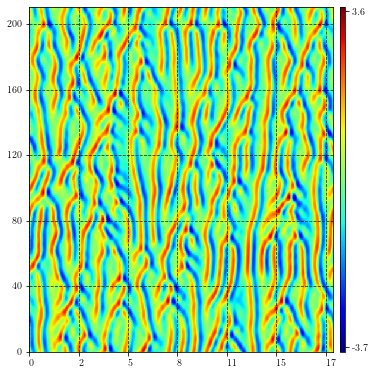

In [29]:


large_tiling_stripwise_result_gdnoprec = converge(large_tiling_stripwise, verbose=True,
                                                  preconditioning=False,comp_time='excessive')
# large_tiling_stripwise_result_gdnoprec.orbit.to_h5('large_tiling_stripwise.h5', directory='../data/local/thesis/large/')
large_tiling_stripwise_result_gdnoprec.orbit.plot(padding=True, padding_shape=(512, 512), save=True,
                                                filename='large_tiling_stripwise.pdf', 
                                                directory=figs)

In [30]:
datadir = '../data/ks/examples/gluing/'
o0=read_h5('OrbitKS_T41p382_L38p050.h5', directory=datadir).reshape(512,512)
o1=read_h5('OrbitKS_T46p754_L31p245.h5', directory=datadir).reshape(512,512)
o2=read_h5('OrbitKS_T43p819_L34p784.h5', directory=datadir).reshape(512,512)
o3=read_h5('OrbitKS_T36p167_L25p720.h5', directory=datadir).reshape(512,512)

random_orbit_td = {0:o0,1:o1,2:o2,3:o3}

np.random.seed(0)
symbol_array = (4*np.random.rand(10, 10)).astype(int)
random_orbit_tiling = tile(symbol_array, random_orbit_td, OrbitKS, stripwise=False).reshape()

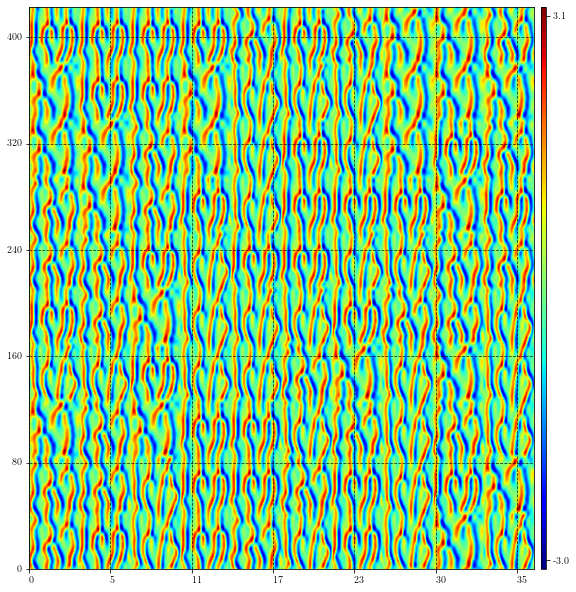

In [31]:
random_orbit_tiling.plot(filename='random_orbit_tiling_initial.pdf', directory=figs)

In [32]:
random_orbit_tiling_result = converge(random_orbit_tiling, method='adj', verbose=True,comp_time='excessive')


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 18115.48056912323
Target residual tolerance : 3.2768e-05
Maximum iteration number : 16777216
Initial guess : OrbitKS({"basis": "field", "parameters": ["422.8193", "330.7199", "0"], "field_shape": ["128", "256"]})
-------------------------------------------------------------------------------------------------


AssertionError: Convert to spatiotemporal Fourier mode basis before computing mapping func.

In [ ]:
random_orbit_tiling_result.orbit.plot(filename='random_orbit_tiling.pdf', directory=figs)

In [ ]:
random_orbit_tiling_result.orbit.plot()

In [ ]:
random_orbit_tiling_result = converge(random_orbit_tiling, method='gmres',
                                      scipy_kwargs={'tol':1e-5, 'maxiter':10, 'restart':50},
                                      preconditioning=True,
                                      verbose=True)

In [ ]:
random_orbit_tiling_result.orbit.plot()

In [ ]:
random_orbit_tiling_result_prec = converge(random_orbit_tiling, method='gmres', scipy_kwargs={'tol':1e-3},
                                      verbose=True, preconditioning=True)

In [ ]:
test = read_h5('OrbitKS_major_local_shifts_minres.h5', directory='../data/local/testing/')

In [ ]:
shd = shadowing(td[1].reshape(32,32), test.reshape(1024,1024))

In [ ]:
from orbithunter.physics_ks import shadowing

In [ ]:
from orbithunter.gluing import tile_dictionary_ks
td = tile_dictionary_ks()
td[0].plot()
td[1].plot()
td[2].plot()

In [ ]:
from orbithunter.gluing import tile_dictionary_ks
td = tile_dictionary_ks(tileset='space_padded')
td = rediscretize_tiling_dictionary(td, new_shape=(128,128))
# td = tile_dictionary_ks()
symbol_array = np.array([[0, 1], [2, 2], [1, 0]])
tiled_orbit = tile(symbol_array, td, OrbitKS).rescale(3).reshape().transform(to='modes')
tiled_orbit.plot()

In [ ]:
# fig, axes = plt.subplots(1, 2)
# ax1, ax2 = axes.flatten()
# orbits = (tiled_orbit, result.orbit)
# for ax, plot_orbit in zip(axes, orbits):
#     plot_orbit = plot_orbit.transform(to='field')
#     xticks, xlabels, yticks, ylabels = generate_axes_labels(plot_orbit)
#     image = ax.imshow(plot_orbit.transform(to='field').state, extent=[0, plot_orbit.L, 0, plot_orbit.T],
#                           cmap='jet', interpolation='none', aspect='auto')
#     # Include custom ticks and tick labels
#     ax.set_xticks(xticks)
#     ax.set_yticks(yticks)
#     ax.set_xticklabels(xlabels, ha='left')
#     ax.set_yticklabels(ylabels, va='center')
#     ax.grid(True, linestyle='dashed', color='k', alpha=0.8)

    
# # Custom colorbar values
# maxu = round(np.max(plot_orbit.state.ravel()) - 0.1, 2)
# minu = round(np.min(plot_orbit.state.ravel()) + 0.1, 2)

# cbarticks = [minu, maxu]
# cbarticklabels = [str(i) for i in np.round(cbarticks, 1)]
# fig.subplots_adjust(right=0.95)
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size=0.075, pad=0.1)
# cbar = plt.colorbar(image, cax=cax, ticks=cbarticks)
# cbar.ax.set_yticklabels(cbarticklabels)
# plt.show()

In [ ]:
bigstrip = read_h5('OrbitKS_big_tiling_stripwise_gdnoprec.h5', directory='../data/local/testing/big/')
bigstrip.plot(filename='big_tiling_strip.pdf', directory=figs)

In [ ]:
big = read_h5('OrbitKS_big_tiling_gdnoprec.h5', directory='../data/local/testing/big/')
big.plot(filename='big_tiling.pdf', directory=figs)

In [ ]:
read_h5('OrbitKS_big_tiling_stripwise_gdnoprec.h5', directory='../data/local/testing/big').plot()
big_tiling.plot(padding=True, padding_shape=(512, 512), save=True,
                filename='OrbitKS_big_tiling_initial.pdf', 
                directory='../data/local/testing/')

In [ ]:
read_h5('OrbitKS_big_tiling_gdnoprec.h5', directory='../data/local/testing/big').plot()

In [ ]:
big_tiling_result_minres = converge(big_tiling, verbose=True, orbit_maxiter=1000,
                                               method='minres', scipy_kwargs={'tol':1e-8})
big_tiling_result_minres.orbit.to_h5('OrbitKS_big_tiling_minres.h5', directory='../data/local/thesis/')
big_tiling_result_minres.orbit.plt('big_tiling_result.pdf', directory='../data/local/thesis/figures')

In [ ]:
big_tiling_result_minres = converge(big_tiling, verbose=True, orbit_maxiter=1000,
                                               method='minres', scipy_kwargs={'tol':1e-8})
big_tiling_result_minres.orbit.to_h5('OrbitKS_big_tiling_minres.h5', directory='../data/local/testing/')

In [ ]:
big_tiling_result_minres.orbit.plot()

In [ ]:
big_tiling_result_gdnoprec = converge(big_tiling, verbose=True, preconditioning=False)
big_tiling_result_gdnoprec.orbit.to_h5('OrbitKS_big_tiling_gdnoprec.h5', directory='../data/local/testing/')

In [ ]:
big_tiling_result_gdnoprec.orbit.plot(padding=True)

In [ ]:
np.random.seed(0)
big_symbol_array = (3*np.random.rand(10, 10)).astype(int)
big_tiling_stripwise = tile(big_symbol_array, td, OrbitKS, stripwise=True, gluing_order=(1,0)).reshape(64, 128).transform(to='modes')
big_tiling_stripwise.to_h5(filename='OrbitKS_big_tiling_stripwise_initial.h5', directory='../data/local/testing/')
big_tiling_stripwise.plot(show=False, padding=True, padding_shape=(512, 512), save=True, filename='OrbitKS_big_tiling_stripwise_initial.png', directory='../data/local/testing/')
big_tiling_stripwise.plot(padding=True, padding_shape=(512, 512), save=True, filename='OrbitKS_big_tiling_stripwise_initial.pdf', directory='../data/local/testing/')

In [ ]:
big_tiling_stripwise_result_minres = converge(big_tiling_stripwise, verbose=True, orbit_maxiter=1000,
                                               method='minres', scipy_kwargs={'tol':1e-8})
big_tiling_stripwise_result_minres.orbit.to_h5('OrbitKS_big_tiling_stripwise_minres.h5', directory='../data/local/testing/')

In [ ]:
big_tiling_stripwise_result_minres.orbit.plot(padding=True)

In [ ]:
big_tiling_stripwise_result_gd = converge(big_tiling_stripwise, verbose=True)
big_tiling_stripwise_result_gd.orbit.to_h5('OrbitKS_big_tiling_stripwise_gd.h5', directory='../data/local/testing/')

In [ ]:
big_tiling_stripwise_result_gd.orbit.plot()

In [ ]:
np.random.seed(432)
symbol_array = 3*np.random.rand(30, 30).astype(int)
huge_tiling = tile(symbol_array, td, OrbitKS).reshape(512, 512).transform(to='modes')

In [ ]:
from orbithunter.gluing import tile_dictionary_ks
td = rediscretize_tiling_dictionary(tile_dictionary_ks(), new_shape=(256,256))

np.random.seed(432)
symbol_array = (3*np.random.rand(30, 30)).astype(int)
huge_tiling_stripwise = tile(symbol_array, td, OrbitKS, stripwise=True,
                             gluing_order=(1,0)).reshape(256, 512).transform(to='modes')

huge_tiling_stripwise.to_h5(filename='OrbitKS_huge_tiling_stripwise_10_initial.h5', directory='../data/local/testing/')
huge_tiling_stripwise.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, filename='OrbitKS_huge_tiling_stripwise_10_initial.png', directory='../data/local/testing/')
huge_tiling_stripwise.plot(padding=True, padding_shape=(2048, 2048), save=True, filename='OrbitKS_huge_tiling_stripwise_10_initial.pdf', directory='../data/local/testing/')

In [ ]:
huge_tiling_stripwise_result_minres = converge(huge_tiling_stripwise, verbose=True, orbit_maxiter=1000,
                                               method='minres',scipy_kwargs={'tol': 1e-8})
huge_tiling_stripwise_result_minres.orbit.to_h5('OrbitKS_huge_tiling_minres.h5', directory='../data/local/testing/')

In [ ]:
huge_tiling_stripwise_result_minres.orbit.plot(filename='OrbitKS_huge_tiling_minres.png', directory='../data/local/testing/', padding=True, padding_shape=(2048, 2048))
huge_tiling_stripwise_result_minres.orbit.plot(filename='OrbitKS_huge_tiling_minres.pdf', directory='../data/local/testing/', show=False, padding=True, padding_shape=(2048, 2048))

In [ ]:
m = read_h5('RelativeOrbitKS_T15p855_L13p026.h5', directory='../data/tiles/original/').reshape(64, 64)
shift = m.S
from orbithunter.gluing import tile_dictionary_ks
td = tile_dictionary_ks(padded=False, comoving=True)
td[0].plot()
td[1].plot()
td[2].plot()

In [ ]:
from orbithunter.gluing import tile_dictionary_ks
td = rediscretize_tiling_dictionary(tile_dictionary_ks(padded=False, comoving=True), new_shape=(256,256))
td[3] = td[1].reflection()
np.random.seed(432)
symbol_array = (4*np.random.rand(30, 30)).astype(int)
huge_tiling_stripwise_comoving = tile(symbol_array, td, OrbitKS, stripwise=True,
                             gluing_order=(1,0)).reshape(256, 512).transform(to='modes')

huge_tiling_stripwise_comoving.to_h5(filename='OrbitKS_huge_tiling_comoving_stripwise_initial.h5', directory='../data/local/testing/')
huge_tiling_stripwise_comoving.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, filename='OrbitKS_huge_tiling_comoving_stripwise_initial.png', directory='../data/local/testing/')
huge_tiling_stripwise_comoving.plot(padding=True, padding_shape=(2048, 2048), save=True, filename='OrbitKS_huge_tiling_comoving_stripwise_initial.pdf', directory='../data/local/testing/')

In [ ]:
huge_tiling_stripwise_comoving_result_minres = converge(huge_tiling_stripwise_comoving, verbose=True, orbit_maxiter=1000,
                                               method='minres',scipy_kwargs={'tol': 1e-8})
huge_tiling_stripwise_comoving_result_minres.orbit.to_h5('OrbitKS_huge_tiling_comoving_minres.h5', directory='../data/local/testing/')

In [ ]:
huge_tiling_stripwise_comoving_result_minres.orbit.plot(filename='OrbitKS_huge_tiling_comoving_minres.png',
                                                        directory='../data/local/testing/',
                                                        padding=True, padding_shape=(2048, 2048))
huge_tiling_stripwise_comoving_result_minres.orbit.plot(filename='OrbitKS_huge_tiling_comoving_minres.pdf',
                                                        directory='../data/local/testing/',
                                                        show=False, padding=True, padding_shape=(2048, 2048))

In [ ]:
from orbithunter.gluing import tile_dictionary_ks
td = rediscretize_tiling_dictionary(tile_dictionary_ks(padded=False, comoving=True), new_shape=(256,256))
# td[3] = td[1].reflection()
np.random.seed(432)
symbol_array = (4*np.random.rand(30, 30)).astype(int)

td = rediscretize_tiling_dictionary(tile_dictionary_ks(), new_shape=(256,256))
tdr = rediscretize_tiling_dictionary(tile_dictionary_ks(padded=False, comoving=True), new_shape=(256,256))
tdl = tdr.copy()
td_dict = {0: tdl, 1: tdr, 2: td}

local_tiles = []
for s in range(9):
    np.random.seed(s)
    symbol_array = (3*np.random.rand(10, 10)).astype(int)
    np.random.seed(s)
    local_shift_dict = td_dict[int(2*np.random.rand())] 
    local_tiles.append(tile(symbol_array, local_shift_dict, OrbitKS, stripwise=True, gluing_order=(1,0)))

full_tiling_with_local_shifts = glue(np.array(local_tiles).reshape(3,3), OrbitKS, stripwise=True, gluing_order=(1,0))

full_tiling_with_local_shifts.plot()

tiling_with_local_shifts = full_tiling_with_local_shifts.reshape(256, 512)

tiling_with_local_shifts.plot()

tiling_with_local_shifts.to_h5(filename='OrbitKS_huge_tiling_local_velocity_initial.h5', directory='../data/local/testing/')
tiling_with_local_shifts.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, filename='OrbitKS_huge_tiling_local_velocity_initial.png', directory='../data/local/testing/')
tiling_with_local_shifts.plot(padding=True, padding_shape=(2048, 2048), save=True, filename='OrbitKS_huge_tiling_local_velocity_initial.pdf', directory='../data/local/testing/')

tiling_with_local_shifts_result_minres = converge(tiling_with_local_shifts, verbose=True, orbit_maxiter=1000,
                                               method='minres',scipy_kwargs={'tol': 1e-8})
tiling_with_local_shifts_result_minres.orbit.to_h5('OrbitKS_huge_tiling_local_velocity_minres.h5', directory='../data/local/testing/')

tiling_local_velocity_phase2 = tiling_with_local_shifts_result_minres.orbit

tiling_local_velocity_phase2.plot(show=False, padding=True, padding_shape=(2048, 2048), 
                                            save=True, filename='OrbitKS_huge_tiling_local_velocity_minres.png', 
                                            directory='../data/local/testing/')
tiling_local_velocity_phase2.plot(padding=True, padding_shape=(2048, 2048),
                                            save=True, filename='OrbitKS_huge_tiling_local_velocity_minres.pdf',
                                            directory='../data/local/testing/')

local_tiles = []
for s in range(9):
    np.random.seed(s)
    symbol_array = (3*np.random.rand(10, 10)).astype(int)
    np.random.seed(s)
    local_shift_dict = td_dict[int(2*np.random.rand())] 
    local_tiles.append(tile(symbol_array, local_shift_dict, OrbitKS, stripwise=True, gluing_order=(1,0)))

In [ ]:
from orbithunter.gluing import tile_dictionary_ks
td = rediscretize_tiling_dictionary(tile_dictionary_ks(padded=False, comoving=True), new_shape=(256,256))
# td[3] = td[1].reflection()
np.random.seed(432)
symbol_array = (4*np.random.rand(30, 30)).astype(int)

td = rediscretize_tiling_dictionary(tile_dictionary_ks(), new_shape=(256,256))
# tdr = rediscretize_tiling_dictionary(tile_dictionary_ks(padded=False, comoving=True), new_shape=(256,256))



local_tiles = []
for s in range(9):
    np.random.seed(s)
    symbol_array = (3*np.random.rand(10, 10)).astype(int)
    np.random.seed(s)
    local_shift_dict = td_dict[int(2.25*np.random.rand())] 
    local_tiles.append(tile(symbol_array, local_shift_dict, OrbitKS, stripwise=True, gluing_order=(1,0)))

major_local_shifts = glue(np.array(local_tiles).reshape(3,3), OrbitKS, stripwise=True, gluing_order=(1,0))

major_local_shifts.to_h5(filename='OrbitKS_major_local_shifts_initial.h5', directory='../data/local/testing/')
major_local_shifts.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                              filename='OrbitKS_major_local_shifts_initial.png', directory='../data/local/testing/')
major_local_shifts.plot(padding=True, padding_shape=(2048, 2048), save=True,
                              filename='OrbitKS_major_local_shifts_initial.pdf', directory='../data/local/testing/')

major_local_shifts = major_local_shifts.reshape(256, 512)

major_local_shifts_minres = converge(major_local_shifts, verbose=True, orbit_maxiter=1000,
                                               method='minres',scipy_kwargs={'tol': 1e-8})
major_local_shifts_minres.orbit.to_h5('OrbitKS_major_local_shifts_minres.h5', directory='../data/local/testing/')

major_local_shifts_minres.orbit.to_h5(filename='OrbitKS_major_local_shifts_minres.h5', directory='../data/local/testing/')
major_local_shifts_minres.orbit.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                              filename='OrbitKS_major_local_shifts_minres.png', directory='../data/local/testing/')
major_local_shifts_minres.orbit.plot(padding=True, padding_shape=(2048, 2048), save=True,
                              filename='OrbitKS_major_local_shifts_minres.pdf', directory='../data/local/testing/')

In [ ]:
td = tile_dictionary_ks(padding='spacetime')

In [ ]:
478/(2*pi*np.sqrt(2))

In [ ]:
for o in td.values():
    o.plot()

In [ ]:
leftslant = read_h5('RelativeOrbitKS_T8p436_L13p103.h5')
leftslant = leftslant.reshape(256,256)
rightslant = leftslant.reflection()
leftslant = convert_class(leftslant.transform(to='field').change_reference_frame(to='physical'), 
                          OrbitKS).rescale(np.abs(td[1].transform(to='field').state).max())
rightslant = convert_class(rightslant.transform(to='field').change_reference_frame(to='physical'),
                           OrbitKS).rescale(np.abs(td[1].transform(to='field').state).max())
tdl = td.copy()
tdl[1] = leftslant
tdr = td.copy()
tdr[1] = rightslant
td_dict = {0: tdl, 1: tdr, 2: td}

In [ ]:
leftslant = read_h5('RelativeOrbitKS_T8p892_L13p096.h5', 
                    directory='../data/local/continuation/merge_tile_coarse/').reshape(256,256)
rightslant = leftslant.reflection()

leftslant = convert_class(leftslant.transform(to='field').change_reference_frame(to='physical'), 
                          OrbitKS).rescale(np.abs(td[1].transform(to='field').state).max())

rightslant = convert_class(rightslant.transform(to='field').change_reference_frame(to='physical'),
                           OrbitKS).rescale(np.abs(td[1].transform(to='field').state).max())

tdl = td.copy()
tdl[1] = leftslant
tdr = td.copy()
tdr[1] = rightslant
td_dict = {0: tdl, 1: tdr, 2: td}

In [ ]:
local_tiles = []
for s in range(9):
    np.random.seed(s)
    symbol_array = (3*np.random.rand(10, 10)).astype(int)
    np.random.seed(s)
    local_shift_dict = td_dict[int(2.25*np.random.rand())] 
    local_tiles.append(tile(symbol_array, local_shift_dict, OrbitKS, stripwise=True, gluing_order=(1,0)))

In [ ]:
reqv_local_shift = glue(np.array(local_tiles).reshape(3,3), OrbitKS, stripwise=True, gluing_order=(1,0))

In [ ]:
reqv_local_shift.plot(padding=True, padding_shape=(2048, 2048))

In [ ]:
reqv_local_shift.to_h5(filename='OrbitKS_reqv_local_shift_initial.h5', directory='../data/local/testing/')
reqv_local_shift.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                              filename='OrbitKS_reqv_local_shift_initial.png', directory='../data/local/testing/')
reqv_local_shift.plot(padding=True, padding_shape=(2048, 2048), save=True,
                              filename='OrbitKS_reqv_local_shift_initial.pdf', directory='../data/local/testing/')

In [ ]:
reqv_local_shift = reqv_local_shift.reshape(256, 512)

In [ ]:
reqv_local_shift_minres = converge(reqv_local_shift, verbose=True, orbit_maxiter=1000,
                                               method='minres',scipy_kwargs={'tol': 1e-8})
reqv_local_shift_minres.orbit.to_h5('reqv_local_shift_minres.h5', directory='../data/local/testing/')

In [ ]:
reqv_local_shift_minres_gd = converge(reqv_local_shift_minres.orbit, verbose=True, orbit_maxiter=250000, preconditioning=False)
reqv_local_shift_minres_gd.orbit.to_h5('reqv_local_shift_minres_gd.h5', directory='../data/local/testing/')

In [ ]:
reqv_local_shift_minres.orbit.to_h5(filename='OrbitKS_reqv_local_shift.h5', directory='../data/local/testing/')
reqv_local_shift_minres.orbit.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                              filename='OrbitKS_reqv_local_shift.png', directory='../data/local/testing/')
reqv_local_shift_minres.orbit.plot(padding=True, padding_shape=(2048, 2048), save=True,
                              filename='OrbitKS_reqv_local_shift.pdf', directory='../data/local/testing/')

In [ ]:
from orbithunter.gluing import tile_dictionary_ks
td = rediscretize_tiling_dictionary(tile_dictionary_ks(), new_shape=(256,256))
# tdr = rediscretize_tiling_dictionary(tile_dictionary_ks(padded=False, comoving=True), new_shape=(256,256))

local_tiles = []
for s in range(10,):
    np.random.seed(s)
    symbol_array = (3*np.random.rand(10, 10)).astype(int)
    np.random.seed(s)
    local_shift_dict = td_dict[int(2.25*np.random.rand())] 
    local_tiles.append(tile(symbol_array, local_shift_dict, OrbitKS, stripwise=True, gluing_order=(1,0)))

In [ ]:
local_tiles = []
for s in range(10, 40):
    np.random.seed(s)
    symbol_array = (3*np.random.rand(10, 3)).astype(int)
    np.random.seed(s)
    local_shift_dict = td_dict[int(2*np.random.rand())] 
    local_tiles.append(tile(symbol_array, local_shift_dict, RelativeOrbitKS, stripwise=True, gluing_order=(1,0)))

In [ ]:
from orbithunter.gluing import tile_dictionary_ks
td = tile_dictionary_ks(padding='spacetime')
# tdr = rediscretize_tiling_dictionary(tile_dictionary_ks(padded=False, comoving=True), new_shape=(256,256))

rpoleft = read_h5('RelativeOrbitKS_L13p106_T8p646.h5').reshape(256, 256)
rporight = rpoleft.reflection()
rpoleft = convert_class(rpoleft.transform(to='field').change_reference_frame(to='physical'), 
                          OrbitKS).rescale(np.abs(td[1].transform(to='field').state).max())
rporight = convert_class(rporight.transform(to='field').change_reference_frame(to='physical'),
                           OrbitKS).rescale(np.abs(td[1].transform(to='field').state).max())

leftslant = read_h5('RelativeOrbitKS_T8p436_L13p103.h5')
leftslant = leftslant.reshape(256,256)
rightslant = leftslant.reflection()
leftslant = convert_class(leftslant.transform(to='field').change_reference_frame(to='physical'), 
                          OrbitKS).rescale(np.abs(td[1].transform(to='field').state).max())
rightslant = convert_class(rightslant.transform(to='field').change_reference_frame(to='physical'),
                           OrbitKS).rescale(np.abs(td[1].transform(to='field').state).max())


tdl = td.copy()
tdl[0] = leftslant
tdl[1] = rpoleft
tdl[2] = convert_class(td[2], RelativeOrbitKS, parameters=(td[2].T, td[2].L, -td[2].L/2))

tdr = td.copy()
tdr[0] = rightslant
tdr[1] = rporight
tdr[2] = convert_class(td[2], RelativeOrbitKS, parameters=(td[2].T, td[2].L, td[2].L/2))

td_dict = {0: tdl, 1: tdr, 2: td}

test = tdl[2].change_reference_frame(to='physical').state.copy()
tdl[2] = OrbitKS(state=test+1, parameters=tdl[2].parameters, basis='field')

test = tdr[2].change_reference_frame(to='physical').state.copy()
tdr[2] = OrbitKS(state=test-1, parameters=tdr[2].parameters, basis='field')

local_tiles = []
for s in range(10, 60):
    np.random.seed(s)
    symbol_array = (3*np.random.rand(5, 3)).astype(int)
    np.random.seed(s)
    local_shift_dict = td_dict[int(3*np.random.rand())] 
    local_tiles.append(tile(symbol_array, local_shift_dict, RelativeOrbitKS, stripwise=True, gluing_order=(1,0)))

rpo_tiling_orbit = glue(np.array(local_tiles).reshape(-1,10), RelativeOrbitKS, stripwise=True, 
                        nonzero_parameters=True, gluing_order=(1,0)).reshape(256, 256)

In [ ]:
rpo_tiling_orbit.plot(padding=True, padding_shape=(2048,2048), fundamental_domain=False)

In [ ]:
preconditioning=False
methods = 'adj'
rpo_tiling_result = converge(rpo_tiling_orbit.transform(to='modes'), verbose=True, method=methods)

In [ ]:
rpo_tiling_result.orbit.to_h5(('OrbitKS_rpo_tiling_orbit_{}.h5').format(methods),
                        directory='../data/local/huge_testing/')
rpo_tiling_result.orbit.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                              filename=('OrbitKS_rpo_tiling_orbit_{}.png').format(methods),
                       directory='../data/local/huge_testing/')
rpo_tiling_result.orbit.plot(padding=True, padding_shape=(2048, 2048), save=True,
                              filename=('OrbitKS_rpo_tiling_orbit_{}.pdf').format(methods), 
                       directory='../data/local/huge_testing/')

In [ ]:
rpo_tiling_orbit.to_h5(filename='OrbitKS_rpo_tiling_orbit_initial.h5', directory='../data/local/testing/')
rpo_tiling_orbit.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                              filename='OrbitKS_rpo_tiling_orbit_initial.png', directory='../data/local/testing/')
rpo_tiling_orbit.plot(padding=True, padding_shape=(2048, 2048), save=True,
                              filename='OrbitKS_rpo_tiling_orbit_initial.pdf', directory='../data/local/testing/')

for n in range(500):
    rpo_tiling_result = converge(rpo_tiling_orbit.transform(to='modes').reshape(512, 512), verbose=True, maxiter=1,
                                                   method='adj', preconditioning=True)
    rpo_tiling_result.orbit.to_h5(('OrbitKS_rpo_tiling_orbit_n{}.h5').format(),
                            directory='../data/local/huge_testing/')
    rpo_tiling_result.orbit.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                                  filename=('OrbitKS_rpo_tiling_orbit_n{}.png').format(),
                           directory='../data/local/huge_testing/')
    rpo_tiling_result.orbit.plot(padding=True, padding_shape=(2048, 2048), save=True,
                                  filename=('OrbitKS_rpo_tiling_orbit_n{}.pdf').format(), 
                           directory='../data/local/huge_testing/')
    
rpo_tiling_result.to_h5(filename='OrbitKS_rpo_tiling_result.h5', directory='../data/local/testing/')
rpo_tiling_result.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                              filename='OrbitKS_rpo_tiling_result.png', directory='../data/local/testing/')
rpo_tiling_result.plot(padding=True, padding_shape=(2048, 2048), save=True,
                              filename='OrbitKS_rpo_tiling_result.pdf', directory='../data/local/testing/')

In [ ]:
for n in range(500):
    rpo_tiling_result = converge(rpo_tiling_orbit.transform(to='modes').reshape(256, 512), verbose=True, maxiter=1,
                                                   method='gmres', preconditioning=True)
    rpo_tiling_result.orbit.to_h5(('OrbitKS_rpo_tiling_orbit_n{}.h5').format(),
                            directory='../data/local/huge_testing/')
    rpo_tiling_result.orbit.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                                  filename=('OrbitKS_rpo_tiling_orbit_n{}.png').format(),
                           directory='../data/local/huge_testing/')
    rpo_tiling_result.orbit.plot(padding=True, padding_shape=(2048, 2048), save=True,
                                  filename=('OrbitKS_rpo_tiling_orbit_n{}.pdf').format(), 
                           directory='../data/local/huge_testing/')

In [ ]:
rpo_tiling_result.to_h5(filename='OrbitKS_rpo_tiling_result.h5', directory='../data/local/testing/')
rpo_tiling_result.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                              filename='OrbitKS_rpo_tiling_result.png', directory='../data/local/testing/')
rpo_tiling_result.plot(padding=True, padding_shape=(2048, 2048), save=True,
                              filename='OrbitKS_rpo_tiling_result.pdf', directory='../data/local/testing/')